<div class="alert alert-block alert-info">
    <h1>Laboratorio III - 2024</h1>
    <h3>TP Final </h3>    
   <h5>Autores:</h5>
    <ul class="list-group">
        <li class="list-group-item"> Patricia Nuñez </li>
        <li class="list-group-item">Aureliano Chavarria</li>
        <li class="list-group-item">Gaston Larregui</li>
    </ul>
    <h5>Asignatura:</h5>    
    <ul class="list-group">
          <li class="list-group-item">Asignatura: Laboratorio III</li>
          <li class="list-group-item">Tema:  Trabajo Final</li>
          <li class="list-group-item">Profesor: Gustavo Denicolay</li>
     </ul>
</div>


# Cargar librerias

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf


## Grenerales

In [ ]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib')
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}')

Pandas Version: 2.0.3


In [ ]:
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

Matplotlib version: 3.7.1


In [ ]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.25.2


In [ ]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.7.1


In [ ]:
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Carga de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#sell_in_path ='/home/familialarregui/buckets/b1/datasets/sell-in.txt'
#tb_productos_path ='/home/familialarregui/buckets/b1/datasets/tb_productos.txt'
#tb_stocks_path ='/home/familialarregui/buckets/b1/datasets/tb_stocks.txt'
#prod_predecir_path ='/home/familialarregui/buckets/b1/datasets/productos_a_predecir.txt'

sell_in_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/sell-in.txt'
tb_productos_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/tb_productos.txt'
tb_stocks_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/tb_stocks.txt'
prod_predecir_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/productos_a_predecir.txt'
tb_prod_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/prod_predecir_descrip.csv'



In [ ]:
#data = pd.read_csv(file_path)
#sell_in = pd.read_csv(sell_in_path, delimiter='\t')
df_sell = pd.read_csv(sell_in_path, delimiter='\t')
df_productos = pd.read_csv(tb_productos_path, delimiter='\t')
df_stocks = pd.read_csv(tb_stocks_path, delimiter='\t')
df_predecir = pd.read_csv(prod_predecir_path, delimiter='\t')
df_prod_sele = pd.read_csv(tb_prod_path, delimiter=';')

# Procesamiento inicial del dataset


## Procesamiento inicial

In [ ]:
df_sell.head(3)

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.053,0.053
1,201701,10032,20524,0,1,0.136,0.136
2,201701,10217,20524,0,1,0.030,0.030


In [ ]:
unique_counts = df_sell.nunique()
print(unique_counts)

periodo                      36
customer_id                 597
product_id                 1233
plan_precios_cuidados         2
cust_request_qty             84
cust_request_tn          101954
tn                       101922
dtype: int64


In [ ]:
df_ventas = pd.merge(df_sell, df_prod_sele, on='product_id', how='inner')

In [ ]:
df_ventas.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
0,201701,10234,20524,0,2,0.053,0.053,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
1,201701,10032,20524,0,1,0.136,0.136,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2,201701,10217,20524,0,1,0.030,0.030,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
3,201701,10125,20524,0,1,0.023,0.023,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
4,201701,10012,20524,0,11,1.545,1.545,HC,VAJILLA,Cristalino,Importado,500,Abrillantador


In [ ]:
unique_counts = df_ventas.nunique()
print(unique_counts)

periodo                     36
customer_id                597
product_id                 780
plan_precios_cuidados        2
cust_request_qty            84
cust_request_tn          92001
tn                       91942
cat1                         4
cat2                        15
cat3                        84
brand                       35
sku_size                    67
descripcion                427
dtype: int64


# Predicción promedio últimos  6 meses

In [ ]:
# Selección los ultimos 6 meses para calcular promedio de df_sell y df_ventas
periodo_seleccionados = [201907,201908,201909,201910,201911,201912]

df_ventas_6meses = df_ventas[df_ventas['periodo'].isin(periodo_seleccionados)] # Aplicas el filtro utilizando la función isin()

In [ ]:
unique_counts = df_ventas_6meses.nunique()
print(unique_counts)

periodo                      6
customer_id                509
product_id                 780
plan_precios_cuidados        2
cust_request_qty            68
cust_request_tn          31625
tn                       31617
cat1                         4
cat2                        15
cat3                        84
brand                       35
sku_size                    67
descripcion                427
dtype: int64


In [ ]:
df_ventas_6meses.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
2035,201907,10158,20524,0,1,0.015,0.015,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2036,201907,10371,20524,0,1,0.008,0.008,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2037,201907,10100,20524,0,1,0.015,0.015,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2038,201907,10187,20524,0,1,0.008,0.008,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2039,201907,10032,20524,0,1,0.136,0.136,HC,VAJILLA,Cristalino,Importado,500,Abrillantador


In [ ]:
suma_6 = df_ventas_6meses.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index()
promedio_6 = suma_6.groupby(['product_id']).agg({'tn':'mean'}).reset_index()
promedio_6.head()

,product_id,tn
0,20001,1510.652
1,20002,1243.474
2,20003,873.455
3,20004,702.760
4,20005,726.481


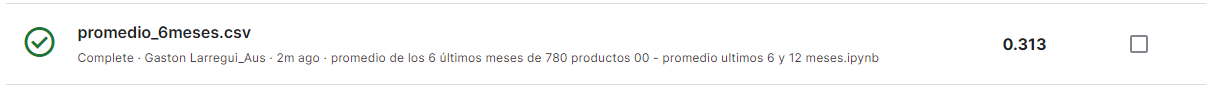

# Predicción promedio últimos 12 meses

In [ ]:
# Selección los ultimos 6 meses para calcular promedio de df_sell y df_ventas
periodo_seleccionados = [201901, 201902,201903,201904,201905,201906, 201907,201908,201909,201910,201911,201912]

df_ventas_12meses = df_ventas[df_ventas['periodo'].isin(periodo_seleccionados)] # Aplicas el filtro utilizando la función isin()

In [ ]:
suma_12 = df_ventas_12meses.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index()
promedio_12 = suma_12.groupby(['product_id']).agg({'tn':'mean'}).reset_index()
promedio_12.head()

,product_id,tn
0,20001,1454.733
1,20002,1175.437
2,20003,784.976
3,20004,627.215
4,20005,668.270


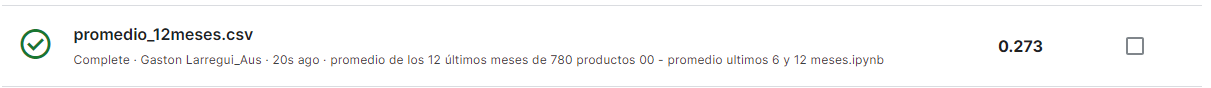

# Archivo Kaggle

In [ ]:
promedio_6.to_csv('/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/00_ FINAL/archivo/promedio_6meses.csv', index=False)
promedio_12.to_csv('/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/00_ FINAL/archivo/promedio_12meses.csv', index=False)